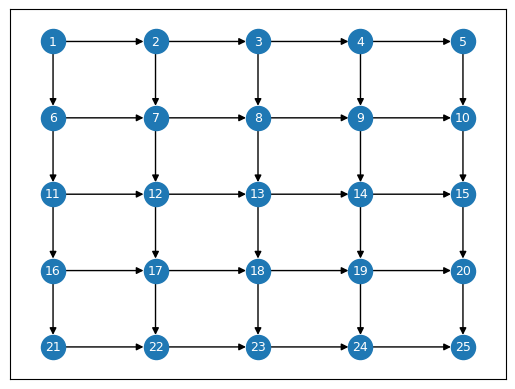

In [1]:
%run utils.py
G,pos = generate_gridNet(5, 5, "Network_5_5.tntp", draw=True, bi_direct=True)

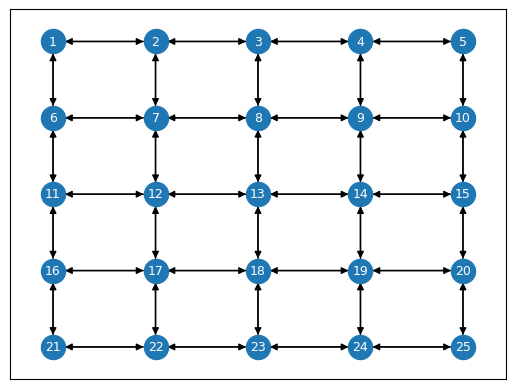

In [3]:
%run utils.py
link = 80
G,pos = generate_gridNet(5, 5, f"_temp_Network_25_{link}.tntp", draw=True, target_links=link)

In [2]:
%run utils.py

dim1 = 5
dim2 = 5
origins = [i for i in range(1,dim1*dim2+1) if (i%dim1!=0)]
dest = [i for i in range(1,dim1*dim2+1) if (i%dim1!=1)]

OD_pairs = get_fullOD_pairs(dim1, dim2)

# Create 10000 entries 
for i in range(1):
    out = generate_Random_ODs(dim1, dim2, 10000, origins, dest, OD_pairs, f'stats_10000_{i+1}.pkl')

nb_entries :  0 . Number OD:  13
nb_entries :  1 . Number OD:  168
nb_entries :  2 . Number OD:  174
nb_entries :  3 . Number OD:  107
nb_entries :  4 . Number OD:  110
nb_entries :  5 . Number OD:  14
nb_entries :  6 . Number OD:  176
nb_entries :  7 . Number OD:  20
nb_entries :  8 . Number OD:  76
nb_entries :  9 . Number OD:  91
nb_entries :  10 . Number OD:  29
nb_entries :  11 . Number OD:  166
nb_entries :  12 . Number OD:  125
nb_entries :  13 . Number OD:  6
nb_entries :  14 . Number OD:  134
nb_entries :  15 . Number OD:  53
nb_entries :  16 . Number OD:  174
nb_entries :  17 . Number OD:  124
nb_entries :  18 . Number OD:  156
nb_entries :  19 . Number OD:  180
nb_entries :  20 . Number OD:  53
nb_entries :  21 . Number OD:  79
nb_entries :  22 . Number OD:  77
nb_entries :  23 . Number OD:  86
nb_entries :  24 . Number OD:  53
nb_entries :  25 . Number OD:  84
nb_entries :  26 . Number OD:  86
nb_entries :  27 . Number OD:  168
nb_entries :  28 . Number OD:  20
nb_entries :

## Fusion of files

In [2]:
import pickle
a_file = open("stats_10000_1.pkl", "rb")

output = pickle.load(a_file)
a_file.close()

S = 0
for k,v in output.items() :
    S = S + len(v)
print(len(output))
print(S)

a_file2 = open("stats_10000_2.pkl", "rb")

output2 = pickle.load(a_file2)
a_file2.close()

S = 0
for k,v in output2.items() :
    S = S + len(v)
print(len(output2))
print(S)

a_file3 = open("stats_10000_3.pkl", "rb")

output3 = pickle.load(a_file3)
a_file3.close()

S = 0
for k,v in output3.items() :
    S = S + len(v)
print(len(output3))
print(S)

a_file4 = open("stats_10000_4.pkl", "rb")

output5 = pickle.load(a_file4)
a_file4.close()

S = 0
for k,v in output5.items() :
    S = S + len(v)
print(len(output5))
print(S)

185
10000
185
10000
185
10000
185
10000


In [3]:
output4 = {}
                
output4 = fuse_stats(output4, output)
output4 = fuse_stats(output4, output2)
output4 = fuse_stats(output4, output3)
output4 = fuse_stats(output4, output5)

S = 0
for k,v in output4.items() :
    S = S + len(v)
print(len(output4))
print(S)

# save fused file
file = open("stats_40000_1.pkl", "wb")
pickle.dump(output4 , file)
file.close()

185
40000


## Flow network : Solving

In [55]:
import pickle

with open('stats_40000_1.pkl', "rb") as a_file:
    stats = pickle.load(a_file)
    a_file.close()
a = list(stats.values())
count = 0
count2 = 0
for i in range(len(a)):
    print(i)
    count2+=len(a[i])
    print("Number of OD matrix, end of index: ", count2)

0
Number of OD matrix, end of index:  203
1
Number of OD matrix, end of index:  425
2
Number of OD matrix, end of index:  651
3
Number of OD matrix, end of index:  881
4
Number of OD matrix, end of index:  1093
5
Number of OD matrix, end of index:  1297
6
Number of OD matrix, end of index:  1525
7
Number of OD matrix, end of index:  1754
8
Number of OD matrix, end of index:  1967
9
Number of OD matrix, end of index:  2180
10
Number of OD matrix, end of index:  2379
11
Number of OD matrix, end of index:  2620
12
Number of OD matrix, end of index:  2860
13
Number of OD matrix, end of index:  3099
14
Number of OD matrix, end of index:  3314
15
Number of OD matrix, end of index:  3526
16
Number of OD matrix, end of index:  3728
17
Number of OD matrix, end of index:  3956
18
Number of OD matrix, end of index:  4163
19
Number of OD matrix, end of index:  4367
20
Number of OD matrix, end of index:  4585
21
Number of OD matrix, end of index:  4809
22
Number of OD matrix, end of index:  5039
23

In [17]:
import pickle
import random
%run utils.py

num_nodes = 25
min_demand = 100
max_demand = 4000

# Create 1000 OD demand
od_demand_list = [generate_OD_demand(num_nodes, min_demand, max_demand) for i in range(4000)]
with open('../Generate_data/Random/od_demand_list_40%.pkl', 'wb') as f:
    pickle.dump(od_demand_list, f)

a_file = open("../Generate_data/Random/od_demand_list_40%.pkl", "rb")
output = pickle.load(a_file)
a_file.close()

for i, od_demand in enumerate(output[:2]):
    print(len(od_demand))
    print(od_demand)

315
{(18, 17): 665, (19, 9): 1114, (8, 9): 1891, (4, 2): 1469, (3, 6): 224, (22, 19): 2498, (14, 15): 3544, (3, 24): 267, (15, 7): 194, (18, 3): 2436, (7, 12): 419, (15, 25): 3611, (18, 21): 3651, (7, 21): 1532, (19, 4): 1601, (8, 4): 1755, (11, 9): 2832, (25, 11): 1345, (10, 22): 1416, (14, 1): 3702, (3, 1): 147, (22, 14): 3253, (14, 10): 3822, (22, 23): 531, (14, 19): 1278, (3, 19): 2478, (18, 7): 2082, (18, 16): 1026, (7, 16): 223, (21, 18): 3300, (10, 8): 3708, (2, 13): 1448, (2, 22): 1155, (3, 5): 3370, (14, 5): 2051, (22, 18): 2090, (3, 23): 2724, (14, 23): 3273, (15, 6): 1865, (18, 2): 1123, (7, 2): 3134, (21, 13): 1334, (21, 22): 3631, (10, 3): 1771, (25, 1): 3642, (10, 12): 2567, (2, 8): 1862, (25, 10): 2760, (10, 21): 2624, (22, 4): 1615, (14, 9): 1755, (3, 18): 119, (9, 25): 176, (6, 10): 2679, (21, 8): 3196, (6, 19): 1626, (21, 17): 555, (2, 12): 1835, (10, 25): 453, (2, 21): 3637, (3, 4): 1518, (17, 15): 1619, (9, 11): 1187, (6, 5): 901, (6, 14): 338, (6, 23): 2357, (24, 1

In [1]:
# from utils import *
from tqdm.notebook import tqdm
%run utils.py

# This file contains 385 OD matrix
a_file = open('../Generate_data/Random/od_demand_list_40%.pkl', "rb")
stats = pickle.load(a_file)
a_file.close()

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('Random/Network_25_80.tntp')
# print(links)
# print(Nodes)

# Output1: for network full 76 links
# Output2: for network 70 links
# Output3: for 70 links
# Output4: for 60 links

time = 375

# for val in tqdm(list(stats.values())):
for OD_matrix in tqdm(stats[375:]) :
    if time < 10000:
        print(time)
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix )
        flows, li, status, sol_time = TA_UE(data, n, OD, Q)
        if status ==2 : # if model solved to optimality => save data, flows, links, status, sol_time
            dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : li, 'model_status': status, 'solving_time':sol_time}
            file_data = open("../Solution/Random_40/5by5_Data{}".format(time), "wb")
            pickle.dump(dataa , file_data)
            file_data.close()
            time += 1
        else : 
            print("Error ! Networks details :")
            print(OD_matrix)
            print("*****************************")

  0%|          | 0/3625 [00:00<?, ?it/s]

375
Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-24
model solved in: 0.5355427265167236
376
model solved in: 0.5392730236053467
377
model solved in: 0.5776567459106445
378
model solved in: 0.5318849086761475
379
model solved in: 0.7953031063079834
380
model solved in: 0.5572121143341064
381
model solved in: 0.5173430442810059
382
model solved in: 0.690889835357666
383
model solved in: 0.5069220066070557
384
model solved in: 0.559154748916626
385
model solved in: 0.6602838039398193
386
model solved in: 0.5206749439239502
387
model solved in: 0.7054140567779541
388
model solved in: 0.5251908302307129
389
model solved in: 0.4979710578918457
390
model solved in: 0.5082991123199463
391
model solved in: 0.5089569091796875
392
model solved in: 0.7907319068908691
393
model solved in: 0.5272867679595947
394
model solved in: 0.5646781921386719
395
model solved in: 0.6306490898132324
396
model solved in: 0.6204462051391602
397
model solved in: 0.51347422